# Logistic Regression with regularization

## Goal:
Classift details of good and bad quality based on two tests.

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
from scipy.optimize import fmin_bfgs

# do ploting inline instead of in a separate window
%matplotlib inline

In [2]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
Mon Feb 13 09:53:16 2017 EET

In [3]:
data = pd.read_csv("./data/microchip-quality(test1_test2_passed).txt", names=['test1', 'test2', 'accepted'], header=None)

In [4]:
data.head(5)

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
data.tail(5)

,test1,test2,accepted
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


## Initial Data Visualizaion

In [6]:
accepted = data.loc[data['accepted'] == 1]
not_accepted = data.loc[data['accepted'] == 0]
print('Number of accepted details: {}'.format(len(accepted)))
print('Number of not accepted details: {}'.format(len(not_accepted)))

Number of accepted details: 58
Number of not accepted details: 60


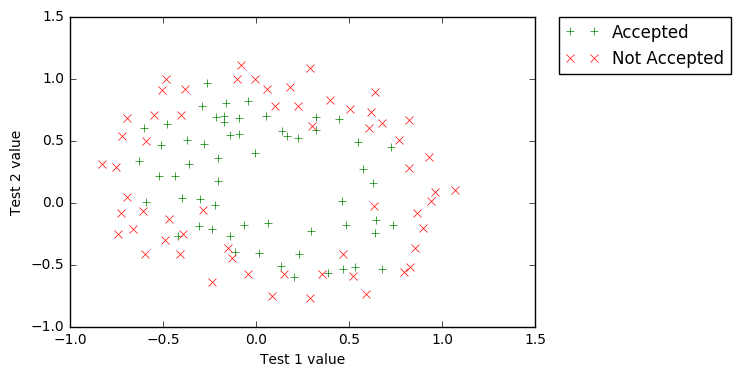

In [7]:
plt.figure()
plt.plot(accepted['test1'].values, accepted['test2'].values, 'g+', label='Accepted')
plt.plot(not_accepted['test1'].values, not_accepted['test2'].values, 'rx', label='Not Accepted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Test 1 value')
plt.ylabel('Test 2 value')
plt.show()

## Cost Function:

In [8]:
X = data[['test1', 'test2']]
X['_bias'] = 1
X = X[['_bias', 'test1', 'test2']].values
y = data[['accepted']].values

In [9]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def costFunction(theta, X, y, reg_alpha):
    theta = np.array([theta]).T
    m = X.shape[0]
    J  = - np.sum(np.multiply(y, np.log(sigmoid(np.dot(X, theta)))) + np.multiply(1 - y,  np.log(1 - sigmoid(np.dot(X, theta))))) / m + reg_alpha * np.sum(np.delete(theta, 0, 0) ** 2) / (2 * m)
    return float(J)

def computeGradients(theta, X, y, reg_alpha):
    theta = np.array([theta]).T
    m = X.shape[0]
    grad = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y)) / m
    temp = theta
    temp[0, 0] = 0
    grad = grad + reg_alpha * temp / m
    return grad.flatten()

def trainLinearReg(X, y, reg_alpha):
    initial_theta = [0] * X.shape[1]
    opt_theta = fmin_bfgs(costFunction, fprime=computeGradients, x0=initial_theta, args=(X, y, reg_alpha), maxiter=50)
    return opt_theta

def mapFeature(X1, X2, degree):
    out = np.ones(X1.shape)
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.concatenate((out, np.multiply(X1 ** j, X2 ** (i - j))), axis=1)
    return out

def featureNormalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [14]:
X_poly = mapFeature(np.array([X[:, 1]]).T, np.array([X[:, 2]]).T, 6)
opt_theta = trainLinearReg(X_poly, y, 1)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


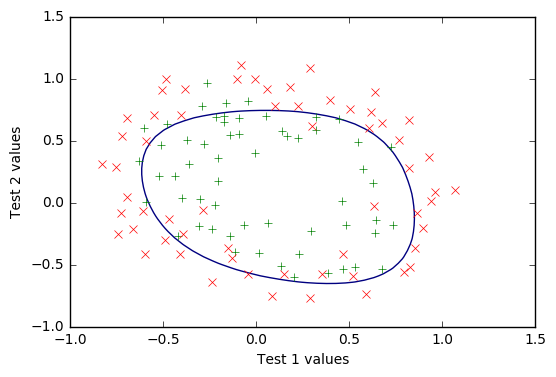

In [15]:
plt.figure()
plt.plot(accepted['test1'].values, accepted['test2'].values, 'g+', label='Accepted')
plt.plot(not_accepted['test1'].values, not_accepted['test2'].values, 'rx', label='Not Accepted')
plt.xlabel('Test 1 values')
plt.ylabel('Test 2 values')


t1 = np.linspace(-1, 1.5, 50)
t2 = np.linspace(-1, 1.5, 50)
z = np.zeros((50, 50))

opt_theta = np.array([opt_theta]).T

for i in range(50):
    for j in range(50):
        z[i,j] = np.dot(mapFeature(np.matrix(t1[i]), np.matrix(t2[j]), 6), opt_theta)

plt.contour(t1, t2, z, 1)

plt.show()